# 画像生成 AI 入門: Python による拡散モデルの理論と実践
## Section 03: Basics of Diffusion Model

最先端の画像生成 AI である拡散モデル (diffusion model) の基礎について導入します。

### Lecture 09: Denoising Diffusion Probabilistic Model (1)

現在注目されている画像生成 AI の元になっているノイズ除去拡散確率モデル (denoising diffusion probabilistic model: DDPM) について、`diffusers` で実際に動かしてみます。


## セットアップ

## GPU が使用できるか確認

本 Colab ノートブックを実行するために GPU ランタイムを使用していることを確認します。CPU ランタイムと比べて画像生成がより早くなります。以下の `nvidia-smi` コマンドが失敗する場合は再度講義資料の `GPU 使用設定` のスライド説明や Google Colab の [FAQ](https://research.google.com/colaboratory/faq.html#gpu-utilization) 等を参考にランタイムタイプが正しく変更されているか確認してください。

In [1]:
!nvidia-smi

Tue Aug 22 06:30:47 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   52C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### 利用する Python ライブラリをインストール

diffusers ライブラリをインストールすることで拡散モデルを簡単に使用できるようにします。diffusers ライブラリを動かす上で必要となライブラリも追加でインストールします:
  - [accelerate](https://github.com/huggingface/accelerate): transformers と連携してより高速な画像生成をサポートするライブラリ

In [2]:
!pip install diffusers==0.16.1
!pip install accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 934.9/934.9 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.2/244.2 kB 5.5 MB/s eta 0:00:00


## DDPM を扱うパイプラインを構築

今回使用する diffusers に用意されている `DDPMPipeline` は数行のコードで拡散モデルである DDPM を使って画像を生成できるパイプラインです。以下のコードを実行することでパイプラインは学習済みのモデルをダウンロードします。 450 MB ほど huggingface のサーバからデータがダウンロードされるので少し待ちます。

今回は DDPM を用いてハリウッドスターの顔画像を生成するように学習した `google/ddpm-celebahq-256` を指定しました。この他にも DDPM 用に学習された重みが複数公開されています: [DDPM Models - Hugging Face](https://huggingface.co/models?library=diffusers&search=ddpm)

第 8 回目の講義でも同様のデータセットで学習された Score SDE で画像を生成しました。以下のコードを実行したときに得られた結果と比較すると面白いと思います。

In [3]:
from diffusers import DDPMPipeline

model_id = "google/ddpm-celebahq-256"

pipe = DDPMPipeline.from_pretrained(model_id)
pipe = pipe.to("cuda")

Fetching 4 files:   0%|          | 0/4 [00:00<?, ?it/s]

DDPM パイプラインで画像を生成する準備が整いました。以下を実行して画像を生成します。

In [4]:
output = pipe()

  0%|          | 0/1000 [00:00<?, ?it/s]

ハリウッドスターとして存在しそうな顔が生成されました。以下の画像は 256 x 256 の解像度を持ちます。

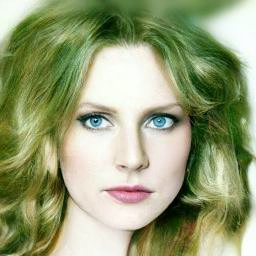

In [5]:
image = output.images[0]
image